In [24]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler # Z-score variables
from sklearn.preprocessing import MinMaxScaler # Min-Max Normalization

from sklearn.model_selection import train_test_split # simple TT split cv

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import plotly.graph_objects as go

In [2]:
# importing sub 1 box select data
sub_I_1_1_box_select_DF = pd.read_csv("../Data/Sub1/Freeform/session_F_ZoomOut_subjID_1_04-14-23_02-25-01.csv")
sub_I_1_1_box_select_DF.drop(sub_I_1_1_box_select_DF[(sub_I_1_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_1_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_1_1_box_select_DF.insert(0, 'participant_num', 1)
sub_I_1_1_box_select_DF.head()

participant_num        time absolute_time  left_handed  right_handed  \
559                1  215.427338   14:25:9:496          0.0           1.0   
560                1  215.441452   14:25:9:511          0.0           1.0   
561                1  215.455185   14:25:9:524          0.0           1.0   
562                1  215.469070   14:25:9:538          0.0           1.0   
563                1  215.483047   14:25:9:552          0.0           1.0   

     trigger_pull_amount_left  trigger_pull_amount_right  gesture_counter_UI  \
559                       0.0                        1.0                 1.0   
560                       0.0                        1.0                 1.0   
561                       0.0                        1.0                 1.0   
562                       0.0                        1.0                 1.0   
563                       0.0                        1.0                 1.0   

    x_pressed  x_counter  ...  object_type  object_translation_x  \
559     False        0.0  ...          NaN                   NaN   
560     False        0.0  ...          NaN                   NaN   
561     False        0.0  ...          NaN                   NaN   
562     False        0.0  ...          NaN                   NaN   
563     False        0.0  ...          NaN                   NaN   

     object_translation_y  object_translation_z  object_rotation_x  \
559                   NaN                   NaN                NaN   
560                   NaN                   NaN                NaN   
561                   NaN                   NaN                NaN   
562                   NaN                   NaN                NaN   
563                   NaN                   NaN                NaN   

     object_rotation_y  object_rotation_z  object_rotation_w  activity  \
559                NaN                NaN                NaN       NaN   
560                NaN                NaN                NaN       NaN   
561                NaN                NaN                NaN       NaN   
562                NaN                NaN                NaN       NaN   
563                NaN                NaN                NaN       NaN   

     Unnamed: 47  
559          NaN  
560          NaN  
561          NaN  
562          NaN  
563          NaN  

[5 rows x 49 columns]

In [3]:
# importing sub 2 box select data
sub_I_2_1_box_select_DF = pd.read_csv("../Data/Sub2/Freeform/session_F_ZoomOut_subjID_2_04-14-23_03-52-31.csv")
sub_I_2_1_box_select_DF.drop(sub_I_2_1_box_select_DF[(sub_I_2_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_2_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_2_1_box_select_DF.insert(0, 'participant_num', 2)
sub_I_2_1_box_select_DF.head()

participant_num        time absolute_time  left_handed  right_handed  \
97                 2  302.740662  15:52:32:650            1             0   
98                 2  302.755005  15:52:32:665            1             0   
99                 2  302.768646  15:52:32:678            1             0   
100                2  302.782745  15:52:32:693            1             1   
101                2  302.796600  15:52:32:706            1             1   

     trigger_pull_amount_left  trigger_pull_amount_right  gesture_counter_UI  \
97                      0.284                        0.0                   1   
98                      0.284                        0.0                   1   
99                      1.000                        0.0                   1   
100                     1.000                        1.0                   1   
101                     1.000                        1.0                   1   

     x_pressed  x_counter  ...  object_type  object_translation_x  \
97       False          0  ...          NaN                   NaN   
98       False          0  ...          NaN                   NaN   
99       False          0  ...          NaN                   NaN   
100      False          0  ...          NaN                   NaN   
101      False          0  ...          NaN                   NaN   

     object_translation_y  object_translation_z  object_rotation_x  \
97                    NaN                   NaN                NaN   
98                    NaN                   NaN                NaN   
99                    NaN                   NaN                NaN   
100                   NaN                   NaN                NaN   
101                   NaN                   NaN                NaN   

     object_rotation_y  object_rotation_z  object_rotation_w  activity  \
97                 NaN                NaN                NaN       NaN   
98                 NaN                NaN                NaN       NaN   
99                 NaN                NaN                NaN       NaN   
100                NaN                NaN                NaN       NaN   
101                NaN                NaN                NaN       NaN   

     Unnamed: 47  
97           NaN  
98           NaN  
99           NaN  
100          NaN  
101          NaN  

[5 rows x 49 columns]

In [4]:
# importing sub 3 box select data
sub_I_3_1_box_select_DF = pd.read_csv("../Data/Sub3/Freeform/session_F_ZoomOut_subjID_3_04-28-23_02-21-21.csv")
sub_I_3_1_box_select_DF.drop(sub_I_3_1_box_select_DF[(sub_I_3_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_3_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_3_1_box_select_DF.insert(0, 'participant_num', 3)
sub_I_3_1_box_select_DF.head()

participant_num        time absolute_time  left_handed  right_handed  \
211                3  250.914093  14:21:24:528            1             0   
212                3  250.928146  14:21:24:542            1             1   
213                3  250.941986  14:21:24:556            1             1   
214                3  250.955917  14:21:24:570            1             1   
215                3  250.969818  14:21:24:583            1             1   

     trigger_pull_amount_left  trigger_pull_amount_right  gesture_counter_UI  \
211                     0.137                        0.0                   1   
212                     1.000                        1.0                   1   
213                     1.000                        1.0                   1   
214                     1.000                        1.0                   1   
215                     1.000                        1.0                   1   

     x_pressed  x_counter  ...  object_type  object_translation_x  \
211      False          0  ...          NaN                   NaN   
212      False          0  ...          NaN                   NaN   
213      False          0  ...          NaN                   NaN   
214      False          0  ...          NaN                   NaN   
215      False          0  ...          NaN                   NaN   

     object_translation_y  object_translation_z  object_rotation_x  \
211                   NaN                   NaN                NaN   
212                   NaN                   NaN                NaN   
213                   NaN                   NaN                NaN   
214                   NaN                   NaN                NaN   
215                   NaN                   NaN                NaN   

     object_rotation_y  object_rotation_z  object_rotation_w  activity  \
211                NaN                NaN                NaN       NaN   
212                NaN                NaN                NaN       NaN   
213                NaN                NaN                NaN       NaN   
214                NaN                NaN                NaN       NaN   
215                NaN                NaN                NaN       NaN   

     Unnamed: 47  
211          NaN  
212          NaN  
213          NaN  
214          NaN  
215          NaN  

[5 rows x 49 columns]

In [5]:
# importing sub 4 box select data
sub_I_4_1_box_select_DF = pd.read_csv("../Data/Sub4/Freeform/session_F_ZoomOut_subjID_4_04-28-23_03-33-32.csv")
sub_I_4_1_box_select_DF.drop(sub_I_4_1_box_select_DF[(sub_I_4_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_4_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_4_1_box_select_DF.insert(0, 'participant_num', 4)
sub_I_4_1_box_select_DF.head()

participant_num        time absolute_time  left_handed  right_handed  \
129                4  133.455688  15:33:34:528          1.0           1.0   
130                4  133.469406  15:33:34:541          1.0           1.0   
131                4  133.483505  15:33:34:556          1.0           1.0   
132                4  133.497269  15:33:34:570          1.0           1.0   
133                4  133.511154  15:33:34:583          1.0           1.0   

     trigger_pull_amount_left  trigger_pull_amount_right  gesture_counter_UI  \
129                       1.0                      0.396                 1.0   
130                       1.0                      1.000                 1.0   
131                       1.0                      1.000                 1.0   
132                       1.0                      1.000                 1.0   
133                       1.0                      1.000                 1.0   

    x_pressed  x_counter  ...  object_type  object_translation_x  \
129     False        0.0  ...          NaN                   NaN   
130     False        0.0  ...          NaN                   NaN   
131     False        0.0  ...          NaN                   NaN   
132     False        0.0  ...          NaN                   NaN   
133     False        0.0  ...          NaN                   NaN   

     object_translation_y  object_translation_z  object_rotation_x  \
129                   NaN                   NaN                NaN   
130                   NaN                   NaN                NaN   
131                   NaN                   NaN                NaN   
132                   NaN                   NaN                NaN   
133                   NaN                   NaN                NaN   

     object_rotation_y  object_rotation_z  object_rotation_w  activity  \
129                NaN                NaN                NaN       NaN   
130                NaN                NaN                NaN       NaN   
131                NaN                NaN                NaN       NaN   
132                NaN                NaN                NaN       NaN   
133                NaN                NaN                NaN       NaN   

     Unnamed: 47  
129          NaN  
130          NaN  
131          NaN  
132          NaN  
133          NaN  

[5 rows x 49 columns]

In [6]:
# importing sub 5 box select data
sub_I_5_1_box_select_DF = pd.read_csv("../Data/Sub5/Freeform/session_F_ZoomOut_subjID_5_04-28-23_04-32-51.csv")
sub_I_5_1_box_select_DF.drop(sub_I_5_1_box_select_DF[(sub_I_5_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_5_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_5_1_box_select_DF.insert(0, 'participant_num', 5)
sub_I_5_1_box_select_DF.head()

participant_num        time absolute_time  left_handed  right_handed  \
113                5  195.596313  16:32:53:503            0             1   
114                5  195.610229  16:32:53:517            0             1   
115                5  195.624191  16:32:53:531            0             1   
116                5  195.638031  16:32:53:545            0             1   
117                5  195.652008  16:32:53:559            0             1   

     trigger_pull_amount_left  trigger_pull_amount_right  gesture_counter_UI  \
113                       0.0                      0.010                   1   
114                       0.0                      0.196                   1   
115                       0.0                      0.299                   1   
116                       0.0                      0.423                   1   
117                       0.0                      0.690                   1   

     x_pressed  x_counter  ...  object_type  object_translation_x  \
113      False          0  ...          NaN                   NaN   
114      False          0  ...          NaN                   NaN   
115      False          0  ...          NaN                   NaN   
116      False          0  ...          NaN                   NaN   
117      False          0  ...          NaN                   NaN   

     object_translation_y  object_translation_z  object_rotation_x  \
113                   NaN                   NaN                NaN   
114                   NaN                   NaN                NaN   
115                   NaN                   NaN                NaN   
116                   NaN                   NaN                NaN   
117                   NaN                   NaN                NaN   

     object_rotation_y  object_rotation_z  object_rotation_w  activity  \
113                NaN                NaN                NaN       NaN   
114                NaN                NaN                NaN       NaN   
115                NaN                NaN                NaN       NaN   
116                NaN                NaN                NaN       NaN   
117                NaN                NaN                NaN       NaN   

     Unnamed: 47  
113          NaN  
114          NaN  
115          NaN  
116          NaN  
117          NaN  

[5 rows x 49 columns]

In [7]:
print(sub_I_1_1_box_select_DF.shape)
print(sub_I_2_1_box_select_DF.shape)
print(sub_I_3_1_box_select_DF.shape)
print(sub_I_4_1_box_select_DF.shape)
print(sub_I_5_1_box_select_DF.shape)

(340, 49)
(249, 49)
(277, 49)
(190, 49)
(327, 49)


In [8]:
all_sub_box_select_DF = pd.concat([sub_I_1_1_box_select_DF, sub_I_2_1_box_select_DF, sub_I_3_1_box_select_DF, sub_I_4_1_box_select_DF, sub_I_5_1_box_select_DF])

In [9]:
print(all_sub_box_select_DF.shape)

(1383, 49)


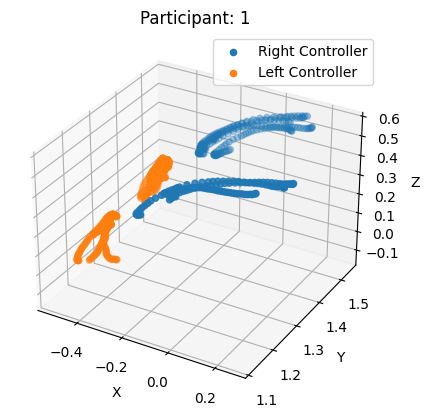

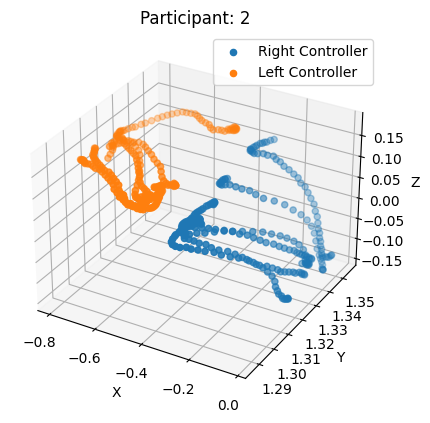

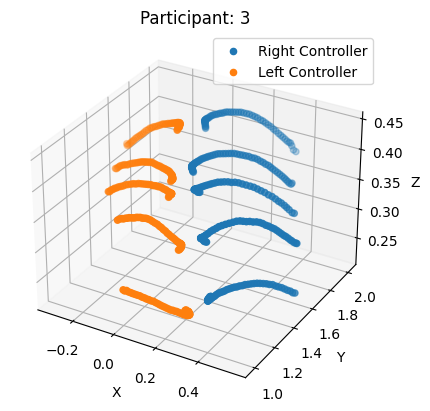

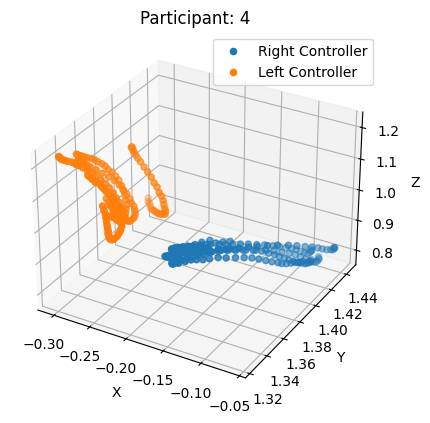

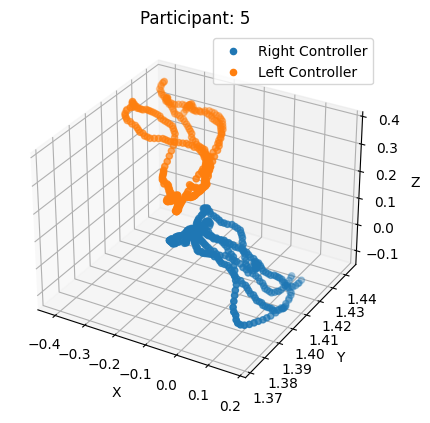

In [10]:
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()
    
    plt.show()

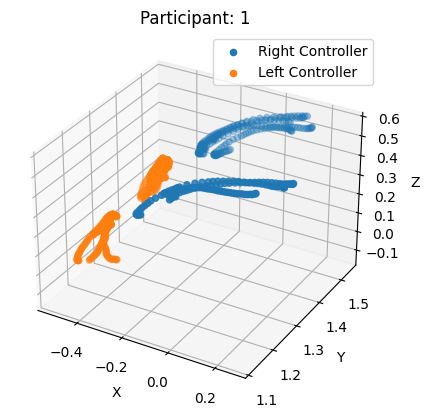

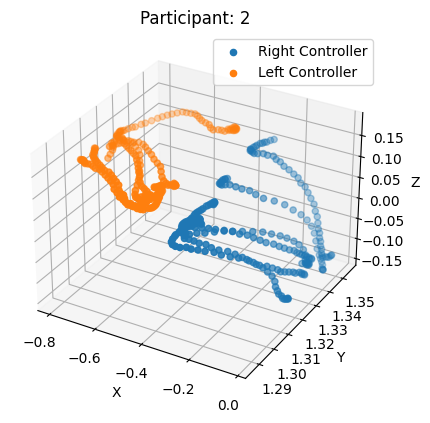

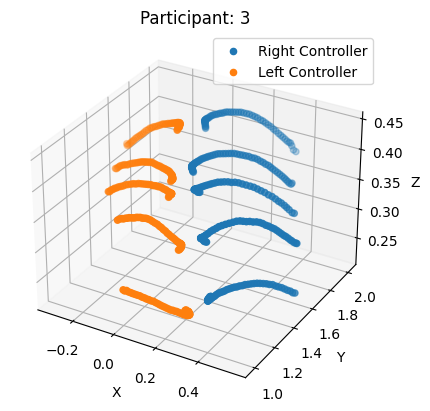

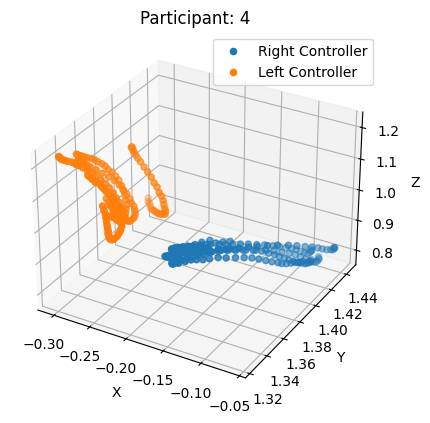

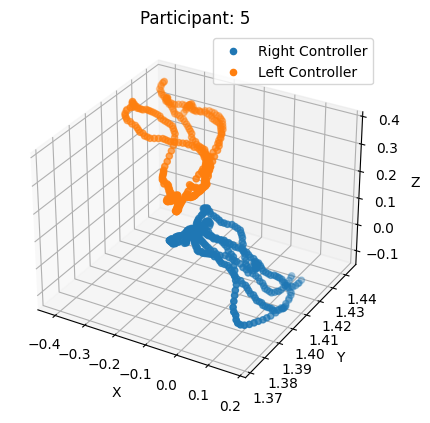

In [11]:
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()

    # Add the rotation interaction
    plt.gcf().canvas.set_window_title(f'Participant: {participant_num}')
    ax.mouse_init()

    plt.show()

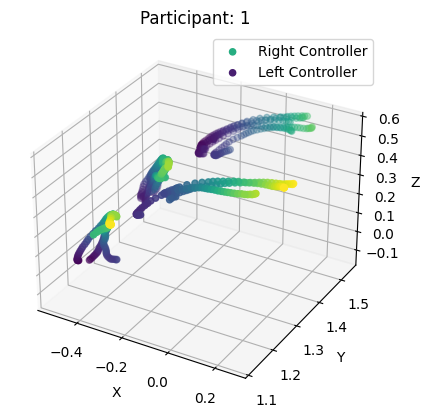

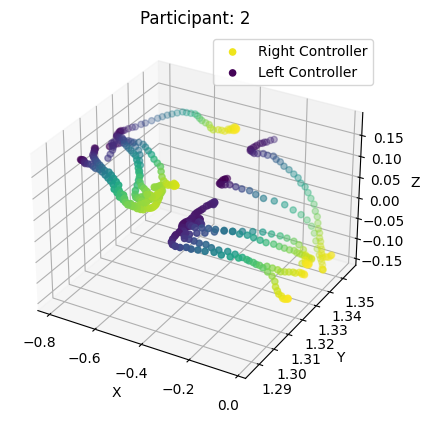

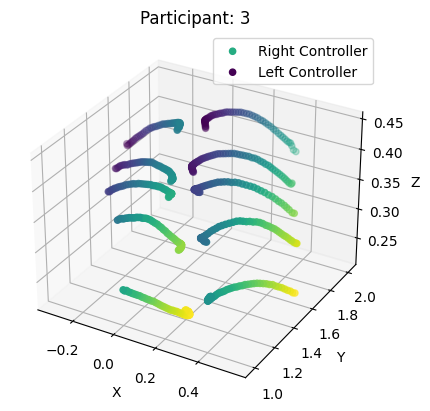

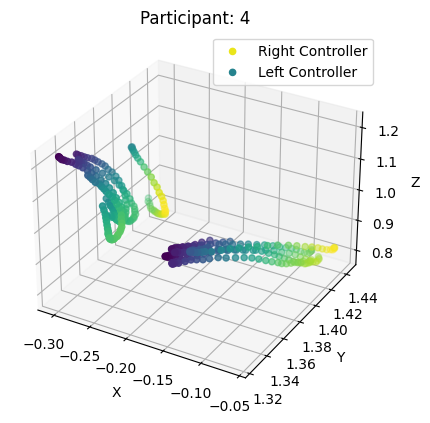

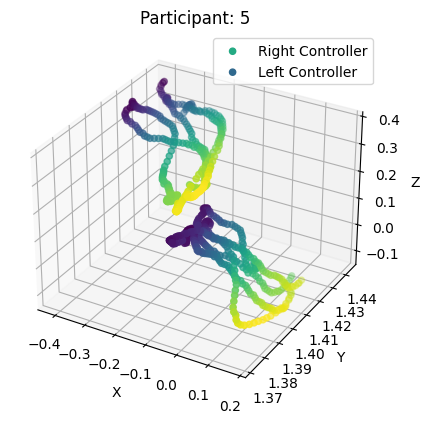

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as colors

grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get start and end values for color mapping
    min_r = group['r_controller_translation_x'].min()
    min_l = group['l_controller_translation_x'].min()
    max_r = group['r_controller_translation_x'].max()
    max_l = group['l_controller_translation_x'].max()

    # Normalize the start and end values
    norm_r = colors.Normalize(vmin=min_r, vmax=max_r)
    norm_l = colors.Normalize(vmin=min_l, vmax=max_l)

    # Create colormap based on the normalized values
    cmap_r = cm.ScalarMappable(norm=norm_r, cmap='viridis').to_rgba(group['r_controller_translation_x'])
    cmap_l = cm.ScalarMappable(norm=norm_l, cmap='viridis').to_rgba(group['l_controller_translation_x'])

    ax.scatter(
        group['r_controller_translation_x'],
        group['r_controller_translation_y'],
        group['r_controller_translation_z'],
        c=cmap_r,  # Assign colors based on colormap for right controller
        label='Right Controller'
    )

    ax.scatter(
        group['l_controller_translation_x'],
        group['l_controller_translation_y'],
        group['l_controller_translation_z'],
        c=cmap_l,  # Assign colors based on colormap for left controller
        label='Left Controller'
    )

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()

    # Add the rotation interaction
    plt.gcf().canvas.set_window_title(f'Participant: {participant_num}')
    ax.mouse_init()

    plt.show()


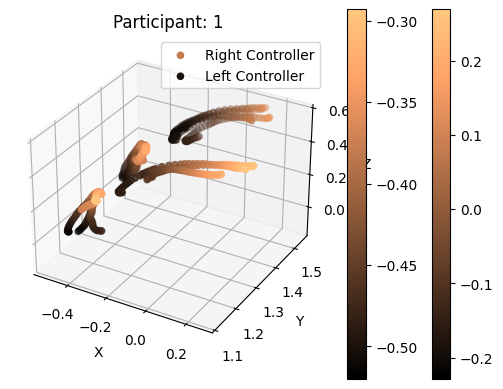

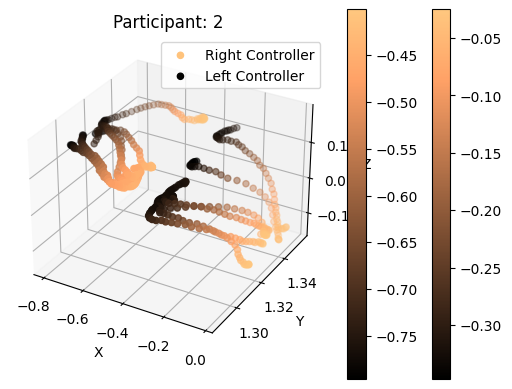

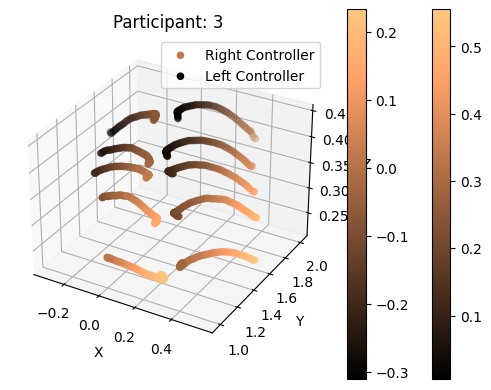

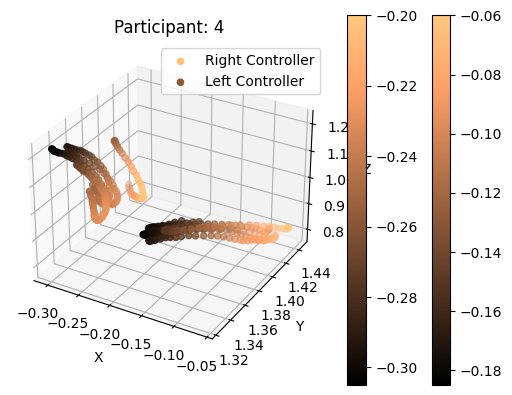

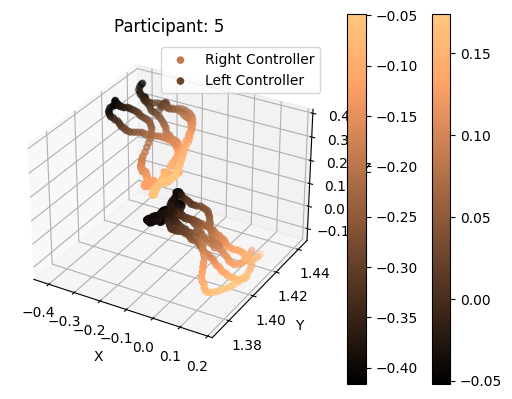

In [18]:
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    rsc = ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], c=group['r_controller_translation_x'], label='Right Controller', cmap="copper")
    lsc = ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], c=group['l_controller_translation_x'], label='Left Controller', cmap="copper")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()

    # Add the rotation interaction
    plt.gcf().canvas.set_window_title(f'Participant: {participant_num}')
    ax.mouse_init()

    plt.colorbar(rsc)
    plt.colorbar(lsc)
    plt.show()


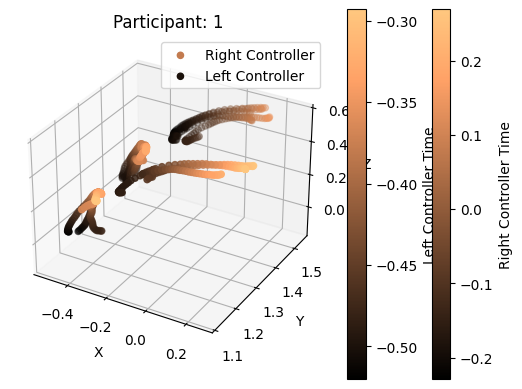

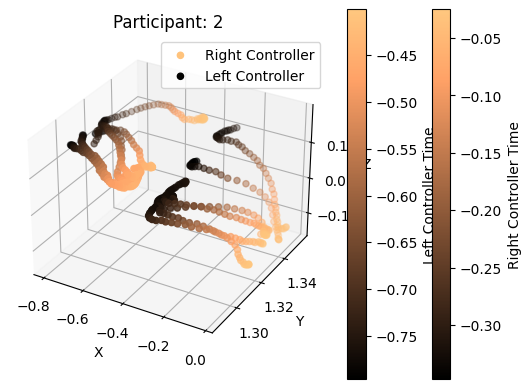

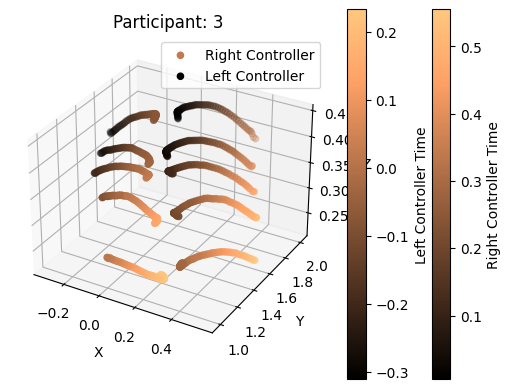

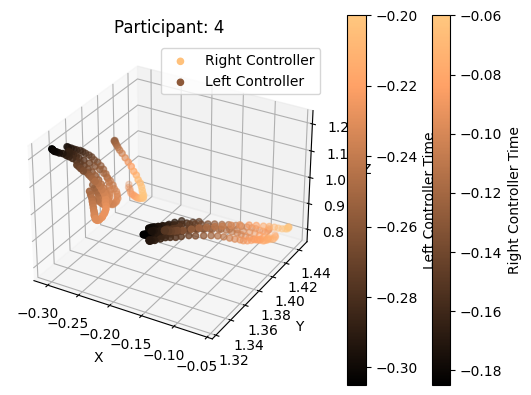

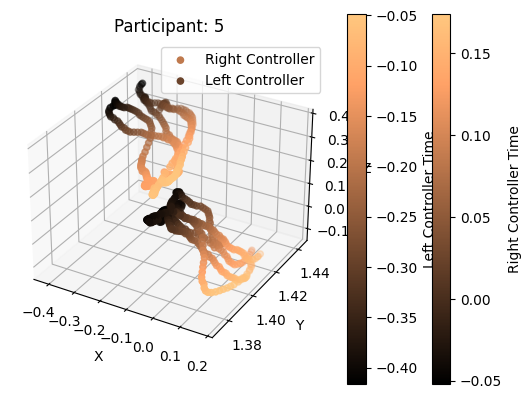

In [21]:
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    rsc = ax.scatter(
        group['r_controller_translation_x'],
        group['r_controller_translation_y'],
        group['r_controller_translation_z'],
        c=group['r_controller_translation_x'],
        label='Right Controller',
        cmap="copper"
    )
    lsc = ax.scatter(
        group['l_controller_translation_x'],
        group['l_controller_translation_y'],
        group['l_controller_translation_z'],
        c=group['l_controller_translation_x'],
        label='Left Controller',
        cmap="copper"
    )
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()

    # Create a separate color mapping for the color bar
    cbar_norm_r = plt.Normalize(group['r_controller_translation_x'].min(), group['r_controller_translation_x'].max())
    cbar_norm_l = plt.Normalize(group['l_controller_translation_x'].min(), group['l_controller_translation_x'].max())
    cmap_r = plt.cm.ScalarMappable(norm=cbar_norm_r, cmap='copper')
    cmap_l = plt.cm.ScalarMappable(norm=cbar_norm_l, cmap='copper')

    # Add the rotation interaction
    plt.gcf().canvas.set_window_title(f'Participant: {participant_num}')
    ax.mouse_init()

    # Create colorbars
    cbar_r = plt.colorbar(cmap_r, ax=ax)
    cbar_r.set_label('Right Controller Time')

    cbar_l = plt.colorbar(cmap_l, ax=ax)
    cbar_l.set_label('Left Controller Time')

    plt.show()


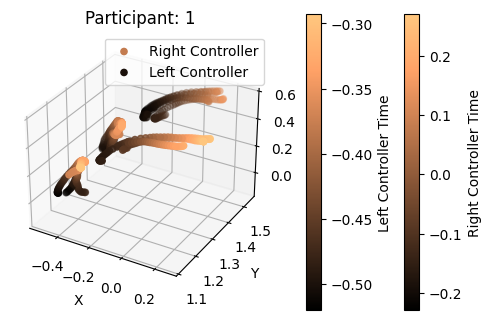

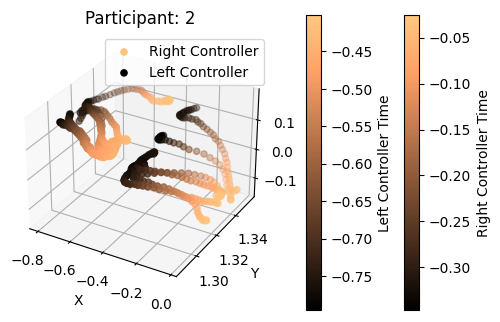

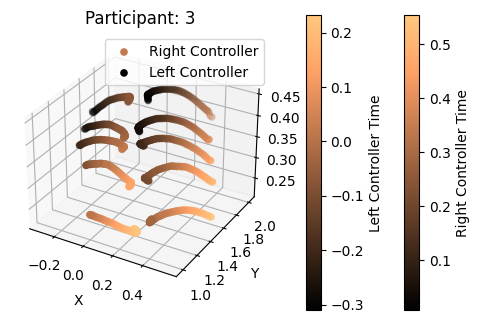

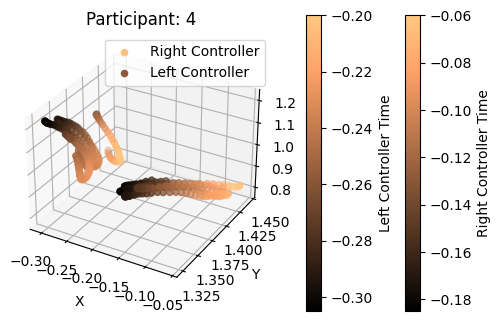

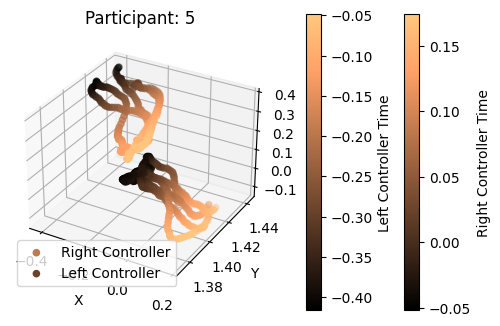

In [22]:
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    rsc = ax.scatter(
        group['r_controller_translation_x'],
        group['r_controller_translation_y'],
        group['r_controller_translation_z'],
        c=group['r_controller_translation_x'],
        label='Right Controller',
        cmap="copper"
    )
    lsc = ax.scatter(
        group['l_controller_translation_x'],
        group['l_controller_translation_y'],
        group['l_controller_translation_z'],
        c=group['l_controller_translation_x'],
        label='Left Controller',
        cmap="copper"
    )
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()

    # Create a separate color mapping for the color bar
    cbar_norm_r = plt.Normalize(group['r_controller_translation_x'].min(), group['r_controller_translation_x'].max())
    cbar_norm_l = plt.Normalize(group['l_controller_translation_x'].min(), group['l_controller_translation_x'].max())
    cmap_r = plt.cm.ScalarMappable(norm=cbar_norm_r, cmap='copper')
    cmap_l = plt.cm.ScalarMappable(norm=cbar_norm_l, cmap='copper')

    # Add the rotation interaction
    plt.gcf().canvas.set_window_title(f'Participant: {participant_num}')
    ax.mouse_init()

    # Create colorbars
    cbar_r = plt.colorbar(cmap_r, ax=ax, pad=0.1, shrink=0.8)
    cbar_r.set_label('Right Controller Time')

    cbar_l = plt.colorbar(cmap_l, ax=ax, pad=0.1, shrink=0.8)
    cbar_l.set_label('Left Controller Time')

    # Adjust the layout to move the color bars to the right
    plt.subplots_adjust(right=0.85)

    plt.show()


In [25]:
import plotly.graph_objects as go
import numpy as np

# Helix equation
t = np.linspace(0, 20, 100)
x, y, z = np.cos(t), np.sin(t), t

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [26]:
import plotly.graph_objects as go

grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=group['r_controller_translation_x'],
        y=group['r_controller_translation_y'],
        z=group['r_controller_translation_z'],
        mode='markers',
        marker=dict(
            size=6,
            color=group['r_controller_translation_x'],  # set color based on x-coordinate
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        ),
        name='Right Controller'
    ))
    fig.add_trace(go.Scatter3d(
        x=group['l_controller_translation_x'],
        y=group['l_controller_translation_y'],
        z=group['l_controller_translation_z'],
        mode='markers',
        marker=dict(
            size=6,
            color=group['l_controller_translation_x'],  # set color based on x-coordinate
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        ),
        name='Left Controller'
    ))
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
        ),
        title=f'Participant: {participant_num}'
    )
    fig.show()


In [27]:
import plotly.graph_objects as go

grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    group['occurrence'] = range(len(group))  # Add occurrence column
    
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=group['r_controller_translation_x'],
        y=group['r_controller_translation_y'],
        z=group['r_controller_translation_z'],
        mode='markers',
        marker=dict(
            size=6,
            color=group['occurrence'],  # set color based on occurrence
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        ),
        name='Right Controller'
    ))
    fig.add_trace(go.Scatter3d(
        x=group['l_controller_translation_x'],
        y=group['l_controller_translation_y'],
        z=group['l_controller_translation_z'],
        mode='markers',
        marker=dict(
            size=6,
            color=group['occurrence'],  # set color based on occurrence
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        ),
        name='Left Controller'
    ))
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
        ),
        title=f'Participant: {participant_num}'
    )
    fig.show()


In [15]:
# only counter variables in dataframe
counter = ["participant_num", "time", "absolute_time", "left_handed", "right_handed", "trigger_pull_amount_left", "trigger_pull_amount_right", "gesture_counter_UI", "x_pressed", "x_counter", "gesture_counter"]
all_sub_box_select_DF_counter = all_sub_box_select_DF[counter]
all_sub_box_select_DF_counter.head()

participant_num        time absolute_time  left_handed  right_handed  \
559                1  215.427338   14:25:9:496          0.0           1.0   
560                1  215.441452   14:25:9:511          0.0           1.0   
561                1  215.455185   14:25:9:524          0.0           1.0   
562                1  215.469070   14:25:9:538          0.0           1.0   
563                1  215.483047   14:25:9:552          0.0           1.0   

     trigger_pull_amount_left  trigger_pull_amount_right  gesture_counter_UI  \
559                       0.0                        1.0                 1.0   
560                       0.0                        1.0                 1.0   
561                       0.0                        1.0                 1.0   
562                       0.0                        1.0                 1.0   
563                       0.0                        1.0                 1.0   

    x_pressed  x_counter  gesture_counter  
559     False        0.0              1.0  
560     False        0.0              1.0  
561     False        0.0              1.0  
562     False        0.0              1.0  
563     False        0.0              1.0

In [16]:
all_sub_box_select_DF_counter.shape

(1383, 11)

In [17]:
translation = ["r_controller_translation_x", "r_controller_translation_y", "r_controller_translation_z", "l_controller_translation_x", "l_controller_translation_y", "l_controller_translation_z"]
all_sub_box_select_DF_translation = all_sub_box_select_DF[translation]

In [18]:
# normalization
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(all_sub_box_select_DF_translation), columns=all_sub_box_select_DF_translation.columns)
df_normalized.head()

r_controller_translation_x  r_controller_translation_y  \
0                    0.472284                    0.441472   
1                    0.467849                    0.442586   
2                    0.465632                    0.442586   
3                    0.458980                    0.441472   
4                    0.449002                    0.440357   

   r_controller_translation_z  l_controller_translation_x  \
0                    0.571429                    0.286686   
1                    0.572316                    0.287658   
2                    0.574091                    0.286686   
3                    0.575865                    0.286686   
4                    0.577640                    0.287658   

   l_controller_translation_y  l_controller_translation_z  
0                    0.613037                    0.140208  
1                    0.613037                    0.146142  
2                    0.613037                    0.150593  
3                    0.614424                    0.154303  
4                    0.617198                    0.158754

In [19]:
df_normalized.shape

(1383, 6)

In [20]:
all_sub_box_select_DF_counter.insert(0, 'index', range(0, 0 + len(all_sub_box_select_DF_counter)))
all_sub_box_select_DF_counter.head()

index  participant_num        time absolute_time  left_handed  \
559      0                1  215.427338   14:25:9:496          0.0   
560      1                1  215.441452   14:25:9:511          0.0   
561      2                1  215.455185   14:25:9:524          0.0   
562      3                1  215.469070   14:25:9:538          0.0   
563      4                1  215.483047   14:25:9:552          0.0   

     right_handed  trigger_pull_amount_left  trigger_pull_amount_right  \
559           1.0                       0.0                        1.0   
560           1.0                       0.0                        1.0   
561           1.0                       0.0                        1.0   
562           1.0                       0.0                        1.0   
563           1.0                       0.0                        1.0   

     gesture_counter_UI x_pressed  x_counter  gesture_counter  
559                 1.0     False        0.0              1.0  
560                 1.0     False        0.0              1.0  
561                 1.0     False        0.0              1.0  
562                 1.0     False        0.0              1.0  
563                 1.0     False        0.0              1.0

In [21]:
df_normalized.insert(0, 'index', range(0, 0 + len(df_normalized)))
df_normalized.head()

index  r_controller_translation_x  r_controller_translation_y  \
0      0                    0.472284                    0.441472   
1      1                    0.467849                    0.442586   
2      2                    0.465632                    0.442586   
3      3                    0.458980                    0.441472   
4      4                    0.449002                    0.440357   

   r_controller_translation_z  l_controller_translation_x  \
0                    0.571429                    0.286686   
1                    0.572316                    0.287658   
2                    0.574091                    0.286686   
3                    0.575865                    0.286686   
4                    0.577640                    0.287658   

   l_controller_translation_y  l_controller_translation_z  
0                    0.613037                    0.140208  
1                    0.613037                    0.146142  
2                    0.613037                    0.150593  
3                    0.614424                    0.154303  
4                    0.617198                    0.158754

In [22]:
merged_all_sub_box_select_DF = pd.merge(left=all_sub_box_select_DF_counter, right=df_normalized, left_on='index', right_on='index')
merged_all_sub_box_select_DF.head()

index  participant_num        time absolute_time  left_handed  \
0      0                1  215.427338   14:25:9:496          0.0   
1      1                1  215.441452   14:25:9:511          0.0   
2      2                1  215.455185   14:25:9:524          0.0   
3      3                1  215.469070   14:25:9:538          0.0   
4      4                1  215.483047   14:25:9:552          0.0   

   right_handed  trigger_pull_amount_left  trigger_pull_amount_right  \
0           1.0                       0.0                        1.0   
1           1.0                       0.0                        1.0   
2           1.0                       0.0                        1.0   
3           1.0                       0.0                        1.0   
4           1.0                       0.0                        1.0   

   gesture_counter_UI x_pressed  x_counter  gesture_counter  \
0                 1.0     False        0.0              1.0   
1                 1.0     False        0.0              1.0   
2                 1.0     False        0.0              1.0   
3                 1.0     False        0.0              1.0   
4                 1.0     False        0.0              1.0   

   r_controller_translation_x  r_controller_translation_y  \
0                    0.472284                    0.441472   
1                    0.467849                    0.442586   
2                    0.465632                    0.442586   
3                    0.458980                    0.441472   
4                    0.449002                    0.440357   

   r_controller_translation_z  l_controller_translation_x  \
0                    0.571429                    0.286686   
1                    0.572316                    0.287658   
2                    0.574091                    0.286686   
3                    0.575865                    0.286686   
4                    0.577640                    0.287658   

   l_controller_translation_y  l_controller_translation_z  
0                    0.613037                    0.140208  
1                    0.613037                    0.146142  
2                    0.613037                    0.150593  
3                    0.614424                    0.154303  
4                    0.617198                    0.158754

In [23]:
merged_all_sub_box_select_DF.shape

(1383, 18)

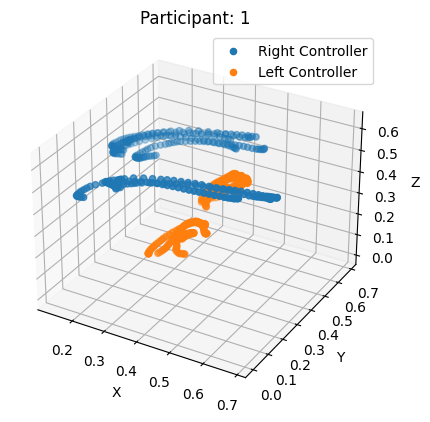

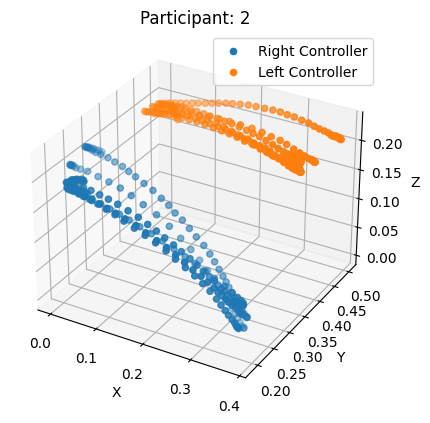

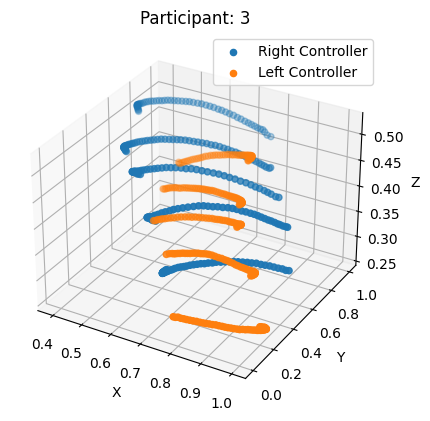

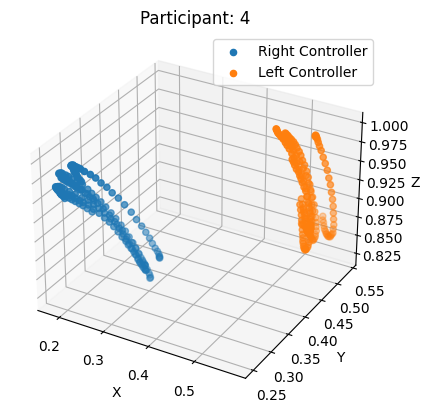

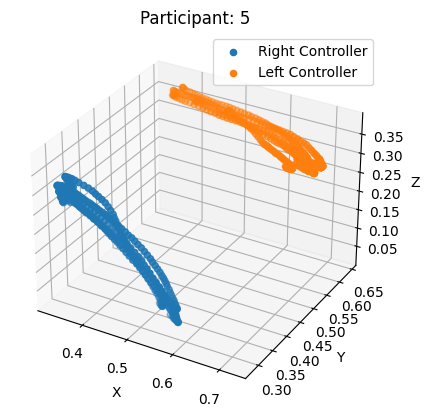

In [24]:
grouped_by_participant = merged_all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()
    plt.show()

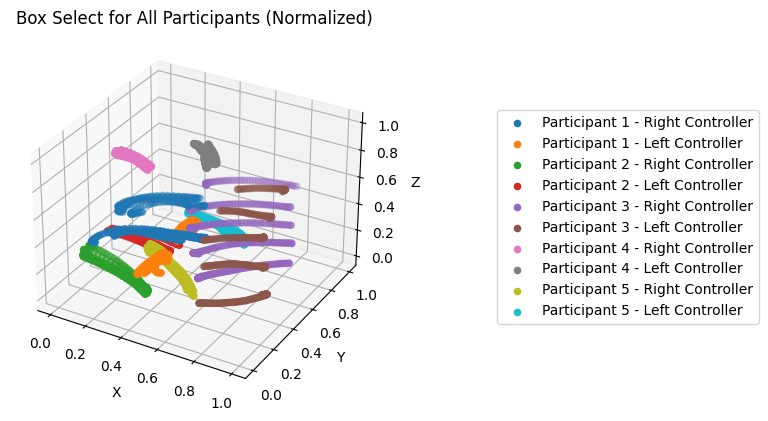

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_participant = merged_all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Participant {participant_num} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Participant {participant_num} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Box Select for All Participants (Normalized)')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()

In [26]:
# importing sub 1 box select data
sub_I_1_1_box_select_DF = pd.read_csv("../Data/Sub1/Freeform/session_F_BoxSelect_subjID_1_04-14-23_02-24-05.csv")
sub_I_1_1_box_select_DF.drop(sub_I_1_1_box_select_DF[(sub_I_1_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_1_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_1_1_box_select_DF.insert(0, 'participant_num', 1)

# importing sub 2 box select data
sub_I_2_1_box_select_DF = pd.read_csv("../Data/Sub2/Freeform/session_F_BoxSelect_subjID_2_04-14-23_03-52-01.csv")
sub_I_2_1_box_select_DF.drop(sub_I_2_1_box_select_DF[(sub_I_2_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_2_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_2_1_box_select_DF.insert(0, 'participant_num', 2)

# importing sub 3 box select data
sub_I_3_1_box_select_DF = pd.read_csv("../Data/Sub3/Freeform/session_F_BoxSelect_subjID_3_04-28-23_02-19-20.csv")
sub_I_3_1_box_select_DF.drop(sub_I_3_1_box_select_DF[(sub_I_3_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_3_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_3_1_box_select_DF.insert(0, 'participant_num', 3)

# importing sub 4 box select data
sub_I_4_1_box_select_DF = pd.read_csv("../Data/Sub4/Freeform/session_F_BoxSelect_subjID_4_04-28-23_03-33-02.csv")
sub_I_4_1_box_select_DF.drop(sub_I_4_1_box_select_DF[(sub_I_4_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_4_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_4_1_box_select_DF.insert(0, 'participant_num', 4)

# importing sub 5 box select data
sub_I_5_1_box_select_DF = pd.read_csv("../Data/Sub5/Freeform/session_F_BoxSelect_subjID_5_04-28-23_04-32-06.csv")
sub_I_5_1_box_select_DF.drop(sub_I_5_1_box_select_DF[(sub_I_5_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_5_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_5_1_box_select_DF.insert(0, 'participant_num', 5)

print(sub_I_1_1_box_select_DF.shape)
print(sub_I_2_1_box_select_DF.shape)
print(sub_I_3_1_box_select_DF.shape)
print(sub_I_4_1_box_select_DF.shape)
print(sub_I_5_1_box_select_DF.shape)

(493, 49)
(188, 49)
(341, 49)
(79, 49)
(343, 49)


In [27]:
all_sub_box_select_DF = pd.concat([sub_I_1_1_box_select_DF, sub_I_2_1_box_select_DF, sub_I_3_1_box_select_DF, sub_I_4_1_box_select_DF, sub_I_5_1_box_select_DF])
print(all_sub_box_select_DF.shape)

(1444, 49)


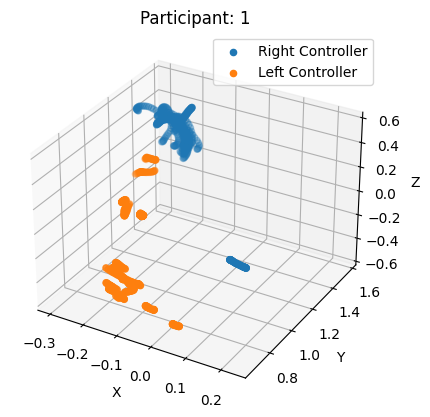

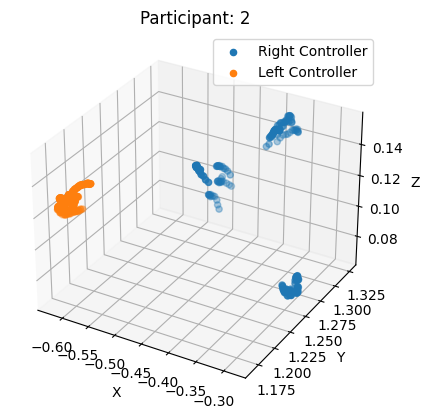

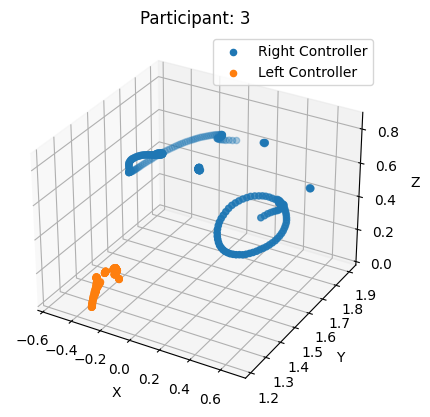

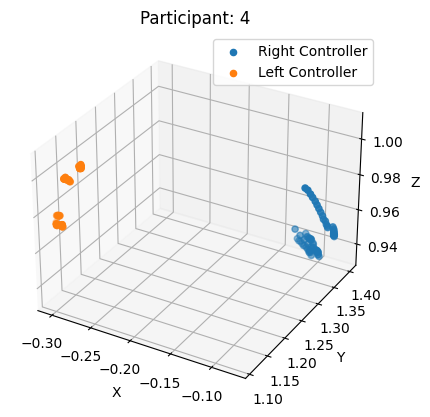

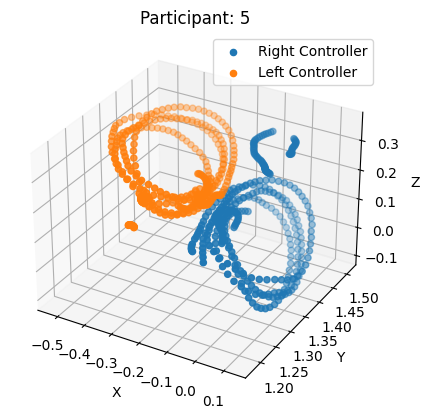

In [28]:
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant: {participant_num}')
    ax.legend()
    plt.show()

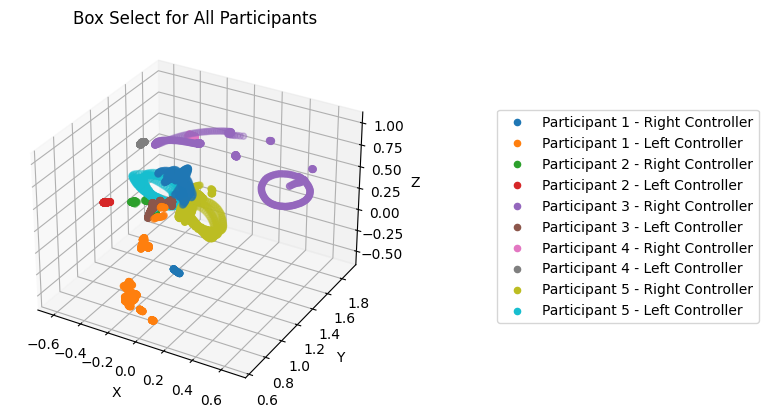

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Participant {participant_num} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Participant {participant_num} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Box Select for All Participants')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()

In [42]:
# importing sub 1 box select data
sub_I_1_1_box_select_DF = pd.read_csv("../Data/Sub1/Freeform/session_F_RotForwardX_subjID_1_04-14-23_02-26-20.csv")
sub_I_1_1_box_select_DF.drop(sub_I_1_1_box_select_DF[(sub_I_1_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_1_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_1_1_box_select_DF.insert(0, 'participant_num', 1)

# importing sub 2 box select data
sub_I_2_1_box_select_DF = pd.read_csv("../Data/Sub2/Freeform/session_F_RotForwardX_subjID_2_04-14-23_03-53-28.csv")
sub_I_2_1_box_select_DF.drop(sub_I_2_1_box_select_DF[(sub_I_2_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_2_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_2_1_box_select_DF.insert(0, 'participant_num', 2)

# importing sub 3 box select data
sub_I_3_1_box_select_DF = pd.read_csv("../Data/Sub3/Freeform/session_F_RotForwardX_subjID_3_04-28-23_02-23-58.csv")
sub_I_3_1_box_select_DF.drop(sub_I_3_1_box_select_DF[(sub_I_3_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_3_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_3_1_box_select_DF.insert(0, 'participant_num', 3)

# importing sub 4 box select data
sub_I_4_1_box_select_DF = pd.read_csv("../Data/Sub4/Freeform/session_F_RotForwardX_subjID_4_04-28-23_03-34-40.csv")
sub_I_4_1_box_select_DF.drop(sub_I_4_1_box_select_DF[(sub_I_4_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_4_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_4_1_box_select_DF.insert(0, 'participant_num', 4)

# importing sub 5 box select data
sub_I_5_1_box_select_DF = pd.read_csv("../Data/Sub5/Freeform/session_F_RotForwardX_subjID_5_04-28-23_04-33-56.csv")
sub_I_5_1_box_select_DF.drop(sub_I_5_1_box_select_DF[(sub_I_5_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_5_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_5_1_box_select_DF.insert(0, 'participant_num', 5)

print(sub_I_1_1_box_select_DF.shape)
print(sub_I_2_1_box_select_DF.shape)
print(sub_I_3_1_box_select_DF.shape)
print(sub_I_4_1_box_select_DF.shape)
print(sub_I_5_1_box_select_DF.shape)

(481, 49)
(389, 49)
(610, 49)
(363, 49)
(430, 49)


In [43]:
all_sub_box_select_DF = pd.concat([sub_I_1_1_box_select_DF, sub_I_2_1_box_select_DF, sub_I_3_1_box_select_DF, sub_I_4_1_box_select_DF, sub_I_5_1_box_select_DF])
print(all_sub_box_select_DF.shape)

(2273, 49)


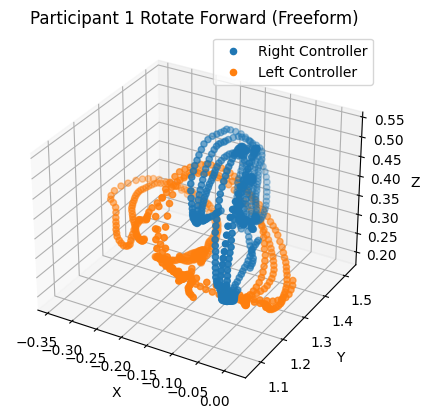

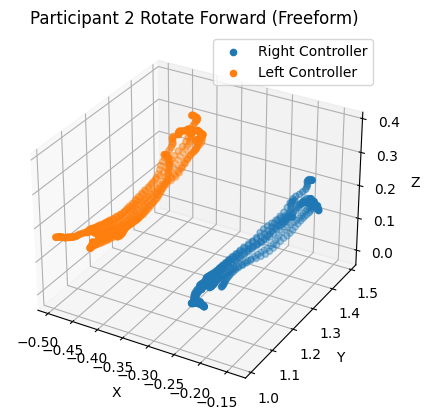

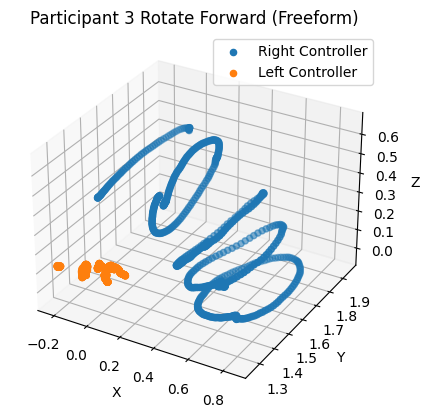

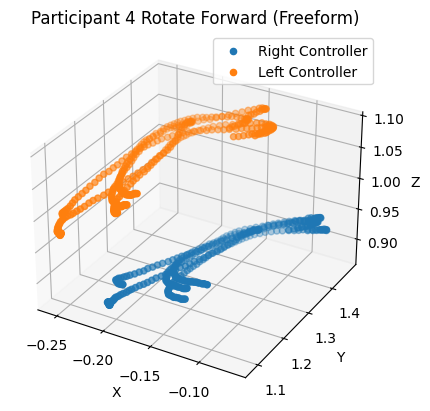

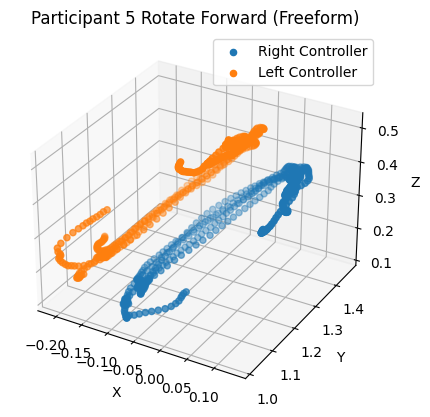

In [44]:
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant {participant_num} Rotate Forward (Freeform)')
    ax.legend()
    plt.show()

In [46]:
import plotly.graph_objects as go

grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    group['occurrence'] = range(len(group))  # Add occurrence column
    
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=group['r_controller_translation_x'],
        y=group['r_controller_translation_z'],
        z=group['r_controller_translation_y'],
        mode='markers',
        marker=dict(
            size=6,
            color=group['occurrence'],  # set color based on occurrence
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        ),
        name='Right Controller'
    ))
    fig.add_trace(go.Scatter3d(
        x=group['l_controller_translation_x'],
        y=group['l_controller_translation_z'],
        z=group['l_controller_translation_y'],
        mode='markers',
        marker=dict(
            size=6,
            color=group['occurrence'],  # set color based on occurrence
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        ),
        name='Left Controller'
    ))
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Z',
            zaxis_title='Y',
        ),
        title=f'Participant: {participant_num} Rotate Forward (Freeform)'
    )
    fig.show()


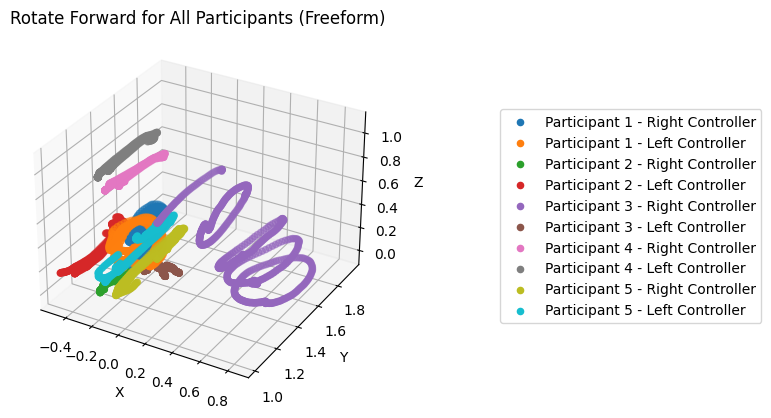

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Participant {participant_num} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Participant {participant_num} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rotate Forward for All Participants (Freeform)')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()

In [38]:
# importing sub 1 box select data
sub_I_1_1_box_select_DF = pd.read_csv("../Data/Sub1/Instructional/session_I_RotForwardX_subjID_1_04-14-23_02-32-53.csv")
sub_I_1_1_box_select_DF.drop(sub_I_1_1_box_select_DF[(sub_I_1_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_1_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_1_1_box_select_DF.insert(0, 'participant_num', 1)

# importing sub 2 box select data
sub_I_2_1_box_select_DF = pd.read_csv("../Data/Sub2/Instructional/session_I_RotForwardX_subjID_2_04-14-23_03-57-53.csv")
sub_I_2_1_box_select_DF.drop(sub_I_2_1_box_select_DF[(sub_I_2_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_2_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_2_1_box_select_DF.insert(0, 'participant_num', 2)

# importing sub 3 box select data
sub_I_3_1_box_select_DF = pd.read_csv("../Data/Sub3/Instructional/session_I_RotForwardX_subjID_3_04-28-23_02-28-38.csv")
sub_I_3_1_box_select_DF.drop(sub_I_3_1_box_select_DF[(sub_I_3_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_3_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_3_1_box_select_DF.insert(0, 'participant_num', 3)

# importing sub 4 box select data
sub_I_4_1_box_select_DF = pd.read_csv("../Data/Sub4/Instructional/session_I_RotForwardX_subjID_4_04-28-23_03-38-07.csv")
sub_I_4_1_box_select_DF.drop(sub_I_4_1_box_select_DF[(sub_I_4_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_4_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_4_1_box_select_DF.insert(0, 'participant_num', 4)

# importing sub 5 box select data
sub_I_5_1_box_select_DF = pd.read_csv("../Data/Sub5/Freeform/session_F_RotForwardX_subjID_5_04-28-23_04-33-56.csv")
sub_I_5_1_box_select_DF.drop(sub_I_5_1_box_select_DF[(sub_I_5_1_box_select_DF['trigger_pull_amount_left'] == 0) & (sub_I_5_1_box_select_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)
sub_I_5_1_box_select_DF.insert(0, 'participant_num', 5)

print(sub_I_1_1_box_select_DF.shape)
print(sub_I_2_1_box_select_DF.shape)
print(sub_I_3_1_box_select_DF.shape)
print(sub_I_4_1_box_select_DF.shape)
print(sub_I_5_1_box_select_DF.shape)

(530, 49)
(453, 49)
(445, 49)
(404, 49)
(430, 49)


In [39]:
all_sub_box_select_DF = pd.concat([sub_I_1_1_box_select_DF, sub_I_2_1_box_select_DF, sub_I_3_1_box_select_DF, sub_I_4_1_box_select_DF, sub_I_5_1_box_select_DF])
print(all_sub_box_select_DF.shape)

(2262, 49)


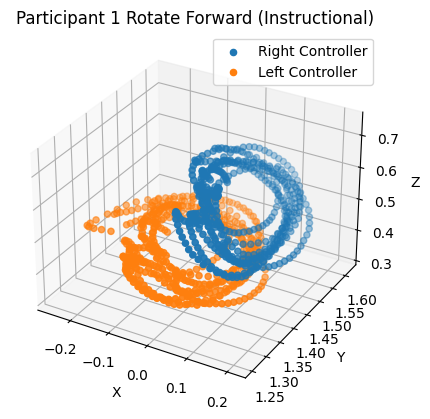

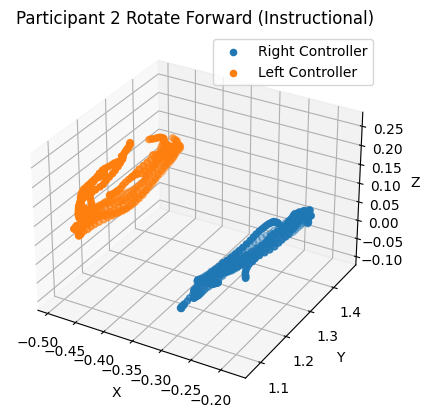

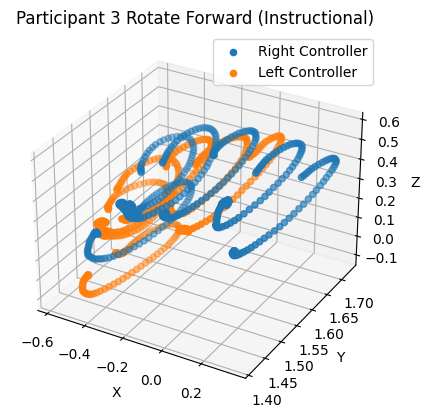

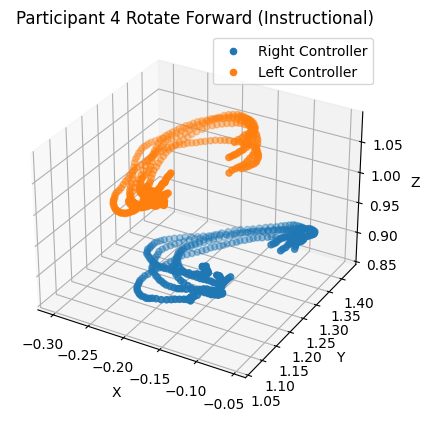

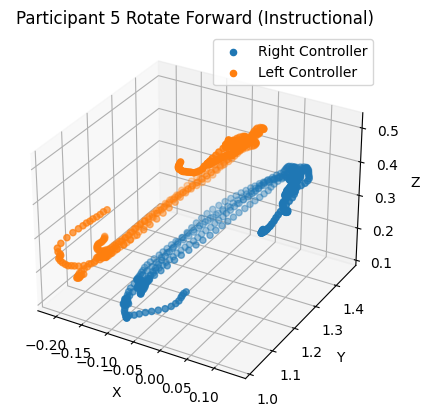

In [40]:
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Participant {participant_num} Rotate Forward (Instructional)')
    ax.legend()
    plt.show()

In [41]:
import plotly.graph_objects as go

grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    group['occurrence'] = range(len(group))  # Add occurrence column
    
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=group['r_controller_translation_x'],
        y=group['r_controller_translation_z'],
        z=group['r_controller_translation_y'],
        mode='markers',
        marker=dict(
            size=6,
            color=group['occurrence'],  # set color based on occurrence
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        ),
        name='Right Controller'
    ))
    fig.add_trace(go.Scatter3d(
        x=group['l_controller_translation_x'],
        y=group['l_controller_translation_z'],
        z=group['l_controller_translation_y'],
        mode='markers',
        marker=dict(
            size=6,
            color=group['occurrence'],  # set color based on occurrence
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        ),
        name='Left Controller'
    ))
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Z',
            zaxis_title='Y',
        ),
        title=f'Participant: {participant_num}'
    )
    fig.show()


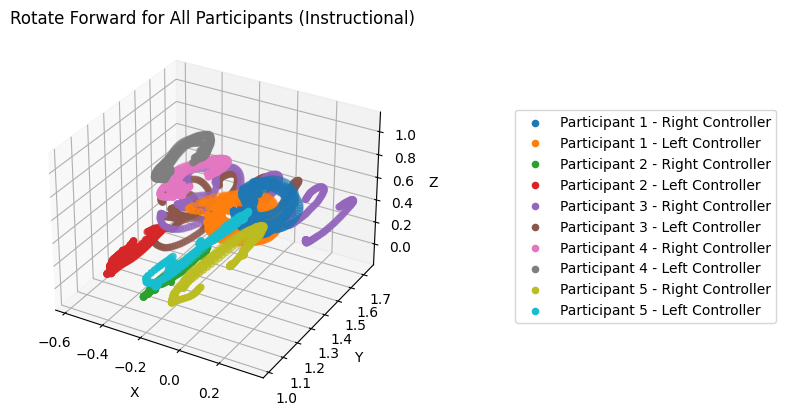

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_participant = all_sub_box_select_DF.groupby('participant_num')

for participant_num, group in grouped_by_participant:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Participant {participant_num} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Participant {participant_num} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rotate Forward for All Participants (Instructional)')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()